In [2]:
import pandas as pd
import numpy as np

house = pd.read_csv("/Users/josemontoro/data/personal/springboard/Capstone/house_prices/house-prices-advanced-regression-techniques/train.csv")


# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 100
pd.set_option('display.max_columns', 100)

In [3]:
# For the rows that have true missing values (MCAR), in Electrical, BsmtFinType2, BsmtExposure, we'll input the most common values

house.at[1379,'Electrical'] = 'SBrkr'
house.at[332, 'BsmtFinType2'] = 'Unf'
house.loc[948, 'BsmtExposure'] = 'Av'


In [64]:
## Converting the identified missing values as necessary

# Converting numerical missing values to 0
filled = house.copy(deep=True)
filled[['LotFrontage', 'MasVnrArea']] = filled[['LotFrontage', 'MasVnrArea']].fillna(value=0)


In [65]:
# Converting the text missing values to 'None'

cols = ['PoolQC',
'MiscFeature',
'Alley',
'Fence',
'FireplaceQu',
'GarageCond',
'GarageType',
'GarageQual',
'GarageFinish',
'MasVnrType',
'BsmtExposure',
'BsmtFinType2',
'BsmtCond',
'BsmtQual',
'BsmtFinType1'
]

filled[cols] = filled[cols].fillna(value='None')


In [69]:
filled['GarageYrBlt'] = filled['GarageYrBlt'].fillna(method='backfill')
# Fill one missing value in this column with method backfilling

In [70]:
## Data Visualization starts here
viz = filled.copy()

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
viz.shape
# How many observations and variables do we have?

(1460, 81)

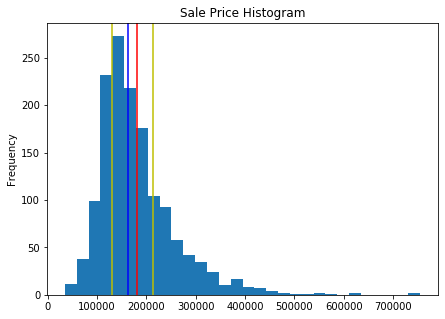

In [73]:
viz['SalePrice'].plot(kind='hist', bins=30, title='Sale Price Histogram', figsize=[7,5])
plt.axvline(viz.SalePrice.mean(), color='r', label='Mean')
plt.axvline(viz.SalePrice.median(), color='b', label='Median')
plt.axvline(viz.SalePrice.quantile(.25), color='y', label='25% Quantile')
plt.axvline(viz.SalePrice.quantile(.75), color='y', label='75% Quantile')
# Distribution of Sale Price

In [74]:
# Min and max of SalePrice
print("The cheapest house costs ${} and the most expensive one costs ${}".format(viz.SalePrice.min(), viz.SalePrice.max()))

The cheapest house costs $34900 and the most expensive one costs $755000


In [75]:
viz.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [76]:
# Separate variables into categorical and numerical for easier analysis

categorical_cols = []
numerical_cols = []

for index, value in viz.dtypes.iteritems():
    if value == object:
        categorical_cols.append(index)
    else:
        numerical_cols.append(index)

In [77]:
print(len(categorical_cols), len(numerical_cols))

43 38


In [78]:
continuous_cols = []
discrete_cols = []


for col in numerical_cols:
    sr = pd.Series(viz[col])
    
    # If there are more than 15 unique values in the variable, we can assume it's continuous
    if len(sr.unique()) > 15:
        continuous_cols.append(col)
    else:
        discrete_cols.append(col)

In [79]:
print(len(continuous_cols), len(discrete_cols))

23 15


In [80]:
corrMatrix = viz[numerical_cols].corr()

In [81]:
corr_filtered = corrMatrix[((corrMatrix > 0.50) | (corrMatrix < -0.50)) & (corrMatrix != 1.0)].dropna(how='all', axis=1).dropna(how='all', axis=0)

corr_filtered


,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,SalePrice
OverallQual,NaN,0.572323,0.550684,NaN,0.537808,NaN,NaN,0.593007,NaN,0.550600,NaN,NaN,NaN,0.508785,0.600671,0.562022,0.790982
YearBuilt,0.572323,NaN,0.592855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.764681,0.537850,NaN,0.522897
YearRemodAdd,0.550684,0.592855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.601408,NaN,NaN,0.507101
BsmtFinSF1,NaN,NaN,NaN,NaN,0.522396,NaN,NaN,NaN,0.649212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalBsmtSF,0.537808,NaN,NaN,0.522396,NaN,0.819530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.613581
1stFlrSF,NaN,NaN,NaN,NaN,0.819530,NaN,NaN,0.566024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.605852
2ndFlrSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.687501,NaN,NaN,0.609707,0.502901,0.616423,NaN,NaN,NaN,NaN
GrLivArea,0.593007,NaN,NaN,NaN,NaN,0.566024,0.687501,NaN,NaN,0.630012,NaN,0.521270,0.825489,NaN,NaN,NaN,0.708624
BsmtFullBath,NaN,NaN,NaN,0.649212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FullBath,0.550600,NaN,NaN,NaN,NaN,NaN,NaN,0.630012,NaN,NaN,NaN,NaN,0.554784,NaN,NaN,NaN,0.560664


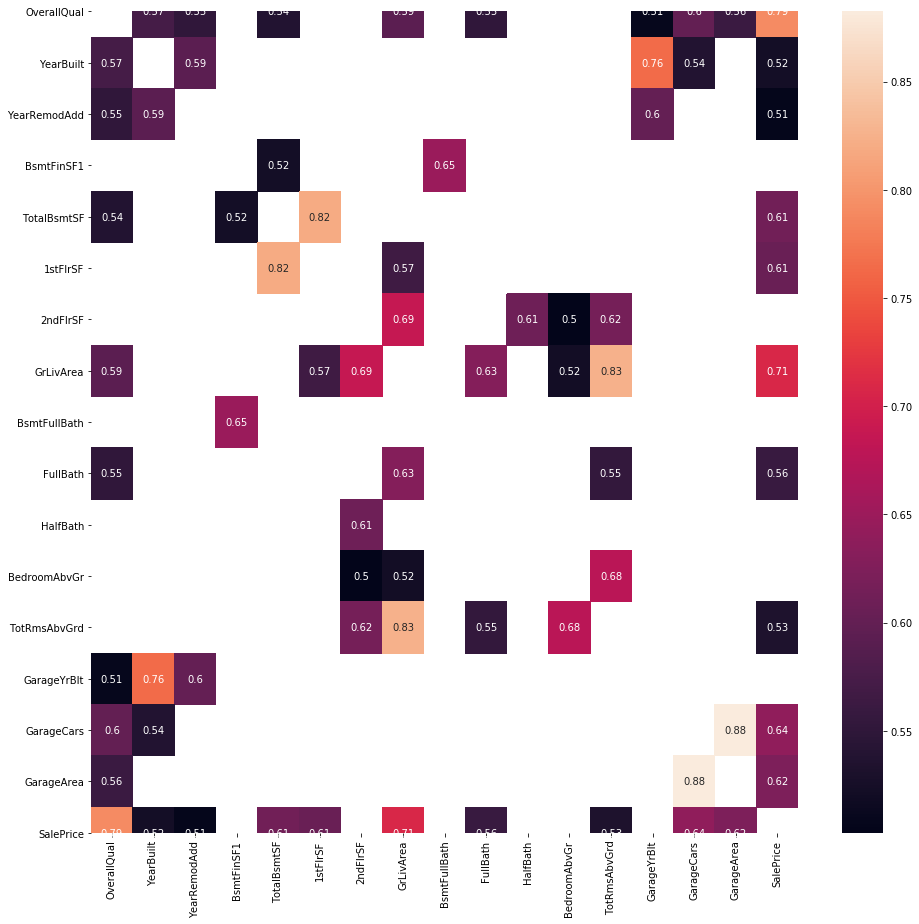

In [82]:
plt.subplots(figsize=(13,12))
plt.tight_layout()
_ = sns.heatmap(corr_filtered, annot=True)

# This heatmaps shows the correlation of only the features that have more than .5 correlation.
# The higher correlation features can be used to do PCA in the modeling step

In [83]:
# Get all variables with > .5 correlation with SalePrice

salePrice_corr = corrMatrix[(corrMatrix > 0.50) & (corrMatrix != 1.0)].dropna(how='all', axis=1).dropna(how='all', axis=0).loc['SalePrice'].dropna()

# These features could be a good candidate for a baseline model
salePrice_corr

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
Name: SalePrice, dtype: float64

In [84]:
high = salePrice_corr.index.to_list()

In [85]:
# Categorical correlation

In [86]:
from scipy.stats import chi2_contingency

# Function to find cramers value for two categorical variables
def cramers_v(x,y):
    """Function to find the cramers value for two categorical variables"""
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r,k = confusion_matrix.shape
    return (chi2/(n*min((k-1),(r-1))))**.5
    
# List of categorical columns from before
categorical_cols
with_cat = viz.copy()

# Transform sale price into a categorical variable
with_cat['saleprice_category'] = pd.cut(viz['SalePrice'], 5)

# Create a dictionary that will show cramers value of target with all the other categorical variables
category_target_cramerv = {}

# Iterate through the cols  
for col in categorical_cols:
    x = with_cat[col]
    y = with_cat['saleprice_category']
    category_target_cramerv[col+'/saleprice'] = cramers_v(x,y)

# Sort the category_target_cramerv so you get the high correlations on top
category_target_cramerv = sorted(category_target_cramerv.items(), key = lambda x : x[1], reverse=True)

In [87]:
category_target_cramerv

# This shows the categorical features that have the highest correlation with SalePrice

[('ExterQual/saleprice', 0.44569856738553454),
 ('KitchenQual/saleprice', 0.42997279399618005),
 ('Neighborhood/saleprice', 0.42830205969477086),
 ('BsmtQual/saleprice', 0.37550674643419657),
 ('GarageFinish/saleprice', 0.34069750943028415),
 ('Foundation/saleprice', 0.26783475834637094),
 ('FireplaceQu/saleprice', 0.26365334596519735),
 ('GarageType/saleprice', 0.257567306861602),
 ('Exterior2nd/saleprice', 0.2448961318508167),
 ('BsmtFinType1/saleprice', 0.233384501653012),
 ('Exterior1st/saleprice', 0.23206214095222713),
 ('MasVnrType/saleprice', 0.228124697840127),
 ('HeatingQC/saleprice', 0.2226059068617394),
 ('PoolQC/saleprice', 0.2061451847908341),
 ('CentralAir/saleprice', 0.19442548873985072),
 ('SaleType/saleprice', 0.187106774354361),
 ('BsmtExposure/saleprice', 0.18551777021039623),
 ('SaleCondition/saleprice', 0.18191883341487636),
 ('LotShape/saleprice', 0.18112027214176532),
 ('HouseStyle/saleprice', 0.17512221809564202),
 ('MSZoning/saleprice', 0.16784580989090658),
 (

In [88]:
# Preparing the data for testing the LR models

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Using only the highest correlated variable, OverallQual
X = viz['OverallQual'].values.reshape(-1,1)
y = viz['SalePrice'].values.reshape(-1,1)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)

In [92]:
# What does it mean we predict the prediction space here?
y_pred = regressor.predict(prediction_space)

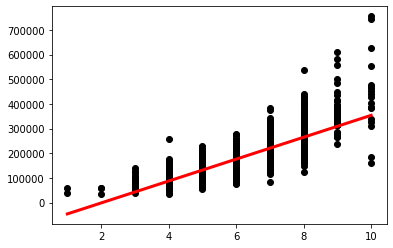

In [93]:
plt.scatter(X, y, color='black')
plt.plot(prediction_space, y_pred, color='red', linewidth=3)
plt.show()

In [94]:
# This is the score of the LR with just this one variable
regressor.score(X_test, y_test)

0.6504677778896862

In [95]:
# This is the training score
regressor.score(X_train, y_train)

# Underfitting with this single variable

0.6170962665508342

In [96]:
## Now we create another linear regression with all the Numeric variables, for comparison

X1 = viz[numerical_cols].drop('SalePrice', axis=1).values
y1 = viz['SalePrice'].values

In [97]:
X1.shape, y1.shape

((1460, 37), (1460,))

In [98]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [99]:
reg1 = LinearRegression()  
reg1.fit(X1_train, y1_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
# Why do I get an error here?
y_pred1 = reg1.predict(X1_test)

In [101]:
reg1.score(X1_test, y1_test)

0.8256389437242928

In [102]:
reg1.score(X1_train, y1_train)

# Pretty close to each other, not overfitting

0.8061637979969615

In [103]:
# Now we create a third one with the highest correlated values

X2 = viz[high].values
y2 = viz['SalePrice'].values

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

reg2 = LinearRegression()  
reg2.fit(X2_train, y2_train) 

reg2.score(X2_test, y2_test)

0.7968483304281101

In [104]:
reg2.score(X2_train, y2_train)
# Pretty close to each other, not overfitting

0.7647556828674686

In [105]:
y_pred2 = reg2.predict(X2_test)

In [106]:
# Lastly a fourth one with some PCA-selected variables

In [107]:
# Getting the variables correlated between .7 and .9
corr_high = corrMatrix[(corrMatrix > 0.70) & (corrMatrix < 0.90) & (corrMatrix != 1.0)].drop('SalePrice').drop('SalePrice', axis=1).dropna(how='all', axis=1).dropna(how='all', axis=0)


In [108]:
corr_high

,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea
YearBuilt,NaN,NaN,NaN,NaN,NaN,0.764681,NaN,NaN
TotalBsmtSF,NaN,NaN,0.81953,NaN,NaN,NaN,NaN,NaN
1stFlrSF,NaN,0.81953,NaN,NaN,NaN,NaN,NaN,NaN
GrLivArea,NaN,NaN,NaN,NaN,0.825489,NaN,NaN,NaN
TotRmsAbvGrd,NaN,NaN,NaN,0.825489,NaN,NaN,NaN,NaN
GarageYrBlt,0.764681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GarageCars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.882475
GarageArea,NaN,NaN,NaN,NaN,NaN,NaN,0.882475,NaN


In [109]:
cols_high = corr_high.columns.to_list()

In [110]:
# Scale values
from sklearn.preprocessing import StandardScaler
x_corr_data1 = viz[['TotalBsmtSF', '1stFlrSF']]
x_corr_data2 = viz[['GrLivArea', 'TotRmsAbvGrd']]
x_corr_data3 = viz[['GarageCars', 'GarageArea']]
# Standardizing the features
pairs = []
for dat in [x_corr_data1, x_corr_data2, x_corr_data3]:
    pairs.append(StandardScaler().fit_transform(dat))
len(pairs)

3

In [111]:
# Execute PCA
from sklearn.decomposition import PCA

new_components = []
for pair in pairs:
    pca = PCA(n_components=1)
    new_components.append(pca.fit_transform(pair))
len(new_components)

3

In [112]:
df_with_pca = viz[numerical_cols].drop(['SalePrice', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'], axis=1)

for i, pca in enumerate(new_components):
    comp = pca.flatten()
    df_with_pca[f'pca{i}'] =  comp
                        

In [113]:
df_with_pca.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'pca0', 'pca1', 'pca2'],
      dtype='object')

In [114]:
# Run the linear regression with the new PCA numerical columns


X3 = df_with_pca.values
y3 = viz['SalePrice'].values

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

reg3 = LinearRegression()  
reg3.fit(X3_train, y3_train) 

reg3.score(X3_test, y3_test)

0.8255523060120666

In [115]:
reg3.score(X3_train, y3_train)
# Pretty close to each other, not overfitting

0.8052848310431742

In [116]:
y_pred3 = reg3.predict(X3_test)

In [117]:
# Let's encode now the Categorical values

# Getting the 10 highest correlated categorical values
cat = category_target_cramerv[:10]
cat

[('ExterQual/saleprice', 0.44569856738553454),
 ('KitchenQual/saleprice', 0.42997279399618005),
 ('Neighborhood/saleprice', 0.42830205969477086),
 ('BsmtQual/saleprice', 0.37550674643419657),
 ('GarageFinish/saleprice', 0.34069750943028415),
 ('Foundation/saleprice', 0.26783475834637094),
 ('FireplaceQu/saleprice', 0.26365334596519735),
 ('GarageType/saleprice', 0.257567306861602),
 ('Exterior2nd/saleprice', 0.2448961318508167),
 ('BsmtFinType1/saleprice', 0.233384501653012)]

In [120]:
cat_all = ['ExterQual', 'KitchenQual', 
           'Neighborhood', 'BsmtQual', 
           'GarageFinish', 'Foundation', 'FireplaceQu', 
           'GarageType', 'Exterior2nd', 'BsmtFinType1']

In [124]:
for col in cat_all:
    print(col)
    print(viz[col].unique())
    

ExterQual
['Gd' 'TA' 'Ex' 'Fa']
KitchenQual
['Gd' 'TA' 'Ex' 'Fa']
Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
BsmtQual
['Gd' 'TA' 'Ex' 'None' 'Fa']
GarageFinish
['RFn' 'Unf' 'Fin' 'None']
Foundation
['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
FireplaceQu
['None' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageType
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'None' 'Basment' '2Types']
Exterior2nd
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']
BsmtFinType1
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'None' 'LwQ']


In [125]:
nominal_var = ['Neighborhood', 'GarageFinish', 'Foundation', 'GarageType', 'Exterior2nd', 'BsmtFinType1']
ordinal_var = ['ExterQual', 'KitchenQual', 'BsmtQual', 'FireplaceQu']

In [153]:
# Duplicate df just to be safe
features = viz.copy(deep=True)

In [137]:
quality_order = {'None': 0, 'Po': 1, 'Fa': 2, 
               'TA': 3, 'Gd': 4, 'Ex': 5}

In [138]:
for col in ordinal_var:
    features[f'{col}_transformed'] = features[col].map(quality_order)

In [154]:
# Transforming nominal attributes 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

for col in nominal_var:
    gle = LabelEncoder()
    col_labels = gle.fit_transform(features[col])
    col_mappings = {index: label for index, label in 
                      enumerate(gle.classes_)}
    # Swith keys and values
    col_mappings = dict((y,x) for x,y in col_mappings.items())
    print(col_mappings)
    features[f'{col}_transformed'] = features[col].map(col_mappings)
    
    # One-hot encoding here
    ohe = OneHotEncoder()
    feature_arr = ohe.fit_transform(
                                  features[[col]]).toarray()
    feature_labels = list(gle.classes_)
    feat_new = pd.DataFrame(feature_arr, 
                                columns=feature_labels)
    features = pd.concat([features, feat_new], axis=1)

{'Blmngtn': 0, 'Blueste': 1, 'BrDale': 2, 'BrkSide': 3, 'ClearCr': 4, 'CollgCr': 5, 'Crawfor': 6, 'Edwards': 7, 'Gilbert': 8, 'IDOTRR': 9, 'MeadowV': 10, 'Mitchel': 11, 'NAmes': 12, 'NPkVill': 13, 'NWAmes': 14, 'NoRidge': 15, 'NridgHt': 16, 'OldTown': 17, 'SWISU': 18, 'Sawyer': 19, 'SawyerW': 20, 'Somerst': 21, 'StoneBr': 22, 'Timber': 23, 'Veenker': 24}
{'Fin': 0, 'None': 1, 'RFn': 2, 'Unf': 3}
{'BrkTil': 0, 'CBlock': 1, 'PConc': 2, 'Slab': 3, 'Stone': 4, 'Wood': 5}
{'2Types': 0, 'Attchd': 1, 'Basment': 2, 'BuiltIn': 3, 'CarPort': 4, 'Detchd': 5, 'None': 6}
{'AsbShng': 0, 'AsphShn': 1, 'Brk Cmn': 2, 'BrkFace': 3, 'CBlock': 4, 'CmentBd': 5, 'HdBoard': 6, 'ImStucc': 7, 'MetalSd': 8, 'Other': 9, 'Plywood': 10, 'Stone': 11, 'Stucco': 12, 'VinylSd': 13, 'Wd Sdng': 14, 'Wd Shng': 15}
{'ALQ': 0, 'BLQ': 1, 'GLQ': 2, 'LwQ': 3, 'None': 4, 'Rec': 5, 'Unf': 6}


In [155]:
features.shape

(1460, 152)

In [156]:
# Drop original categorical columns
features = features.drop(categorical_cols, axis=1)


In [157]:
features.shape

(1460, 109)

In [158]:
# Now let's fit another linear regression model with all numerical features plus this transformed categorical features


# Prepare regression
X4 = features.values
y4 = features['SalePrice'].values

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

reg4 = LinearRegression()  
reg4.fit(X4_train, y4_train) 

display(reg4.score(X4_test, y4_test))
display(reg4.score(X4_train, y4_train))

1.0

1.0